In [1]:
%matplotlib inline
from preamble import *

Take a look at the wave dataset going to used in this jupyter notebook. It is defined in the file mglearn.datasets.py

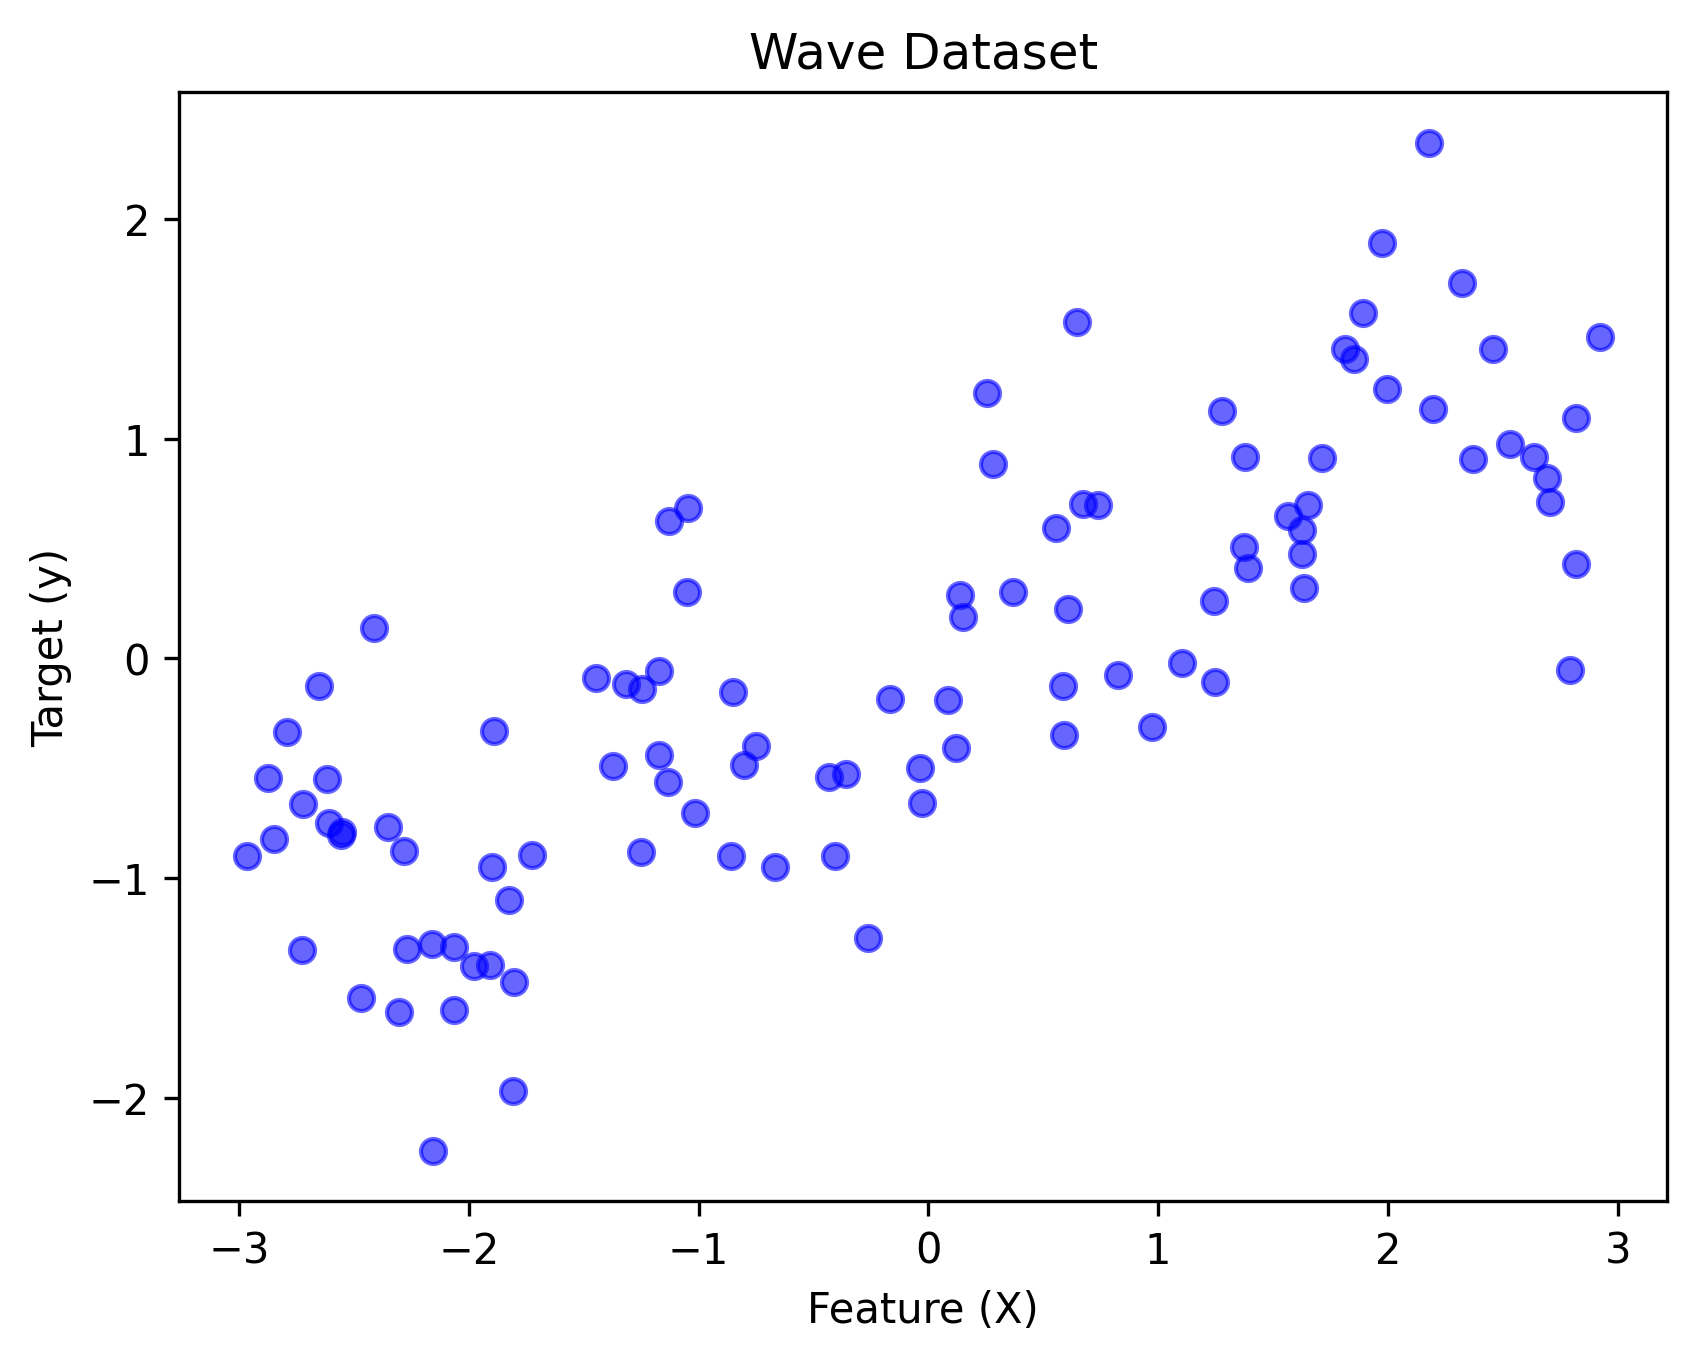

In [26]:
def make_wave(n_samples=100):
    rnd = np.random.RandomState(42)
    x = rnd.uniform(-3, 3, size=n_samples)
    y_no_noise = (np.sin(4 * x) + x)
    y = (y_no_noise + rnd.normal(size=len(x))) / 2
    return x.reshape(-1, 1), y

# Generate the wave dataset
X, y = make_wave(n_samples=100)

# Plot the generated data
plt.scatter(X, y, color='b', alpha=0.6)
plt.xlabel("Feature (X)")
plt.ylabel("Target (y)")
plt.title("Wave Dataset")
plt.show()

# Linear Models

Linear models are a class of models that are widely used in practice and have been studied extensively in the last few decades, with roots going back over a hundred years. Linear models make a prediction using a _linear function_ of the input features, which we will explain shortly.


## Linear models for regression

For multiple linear regression, the general prediction formula for a linear model looks as follows:

$ \hat{y} = \hat{b}_0 + \hat{b}_{1}x_1 + \hat{b}_{2}x_2 + \dots + \hat{b}_{p}x_p $

Here, $ x_1 $ to $ x_p $ denotes the features of a single data point, $ \hat{b}_i $ are parameters of the model that are learned, and $ \hat{y} $ is the prediction the model makes. For a dataset with a single feature, this is:

$ \hat{y} = \hat{b}_0 + \hat{b}_{1}x $

which you might remember from high school mathematics as the equation for a line. Here, $\hat{b}_1$ is the slope and $\hat{b}_0$ is the y-axis offset (intercept). Alternatively, you can think of the predicted response as being a weighted sum of the input features, with weights (which can be negative) given by the values of $\hat{b}_i$.

Trying to learn the parameters $ \hat{b}_i $ on our one-dimensional wave dataset might lead to the following line:

b1: 0.393906  b0: -0.031804


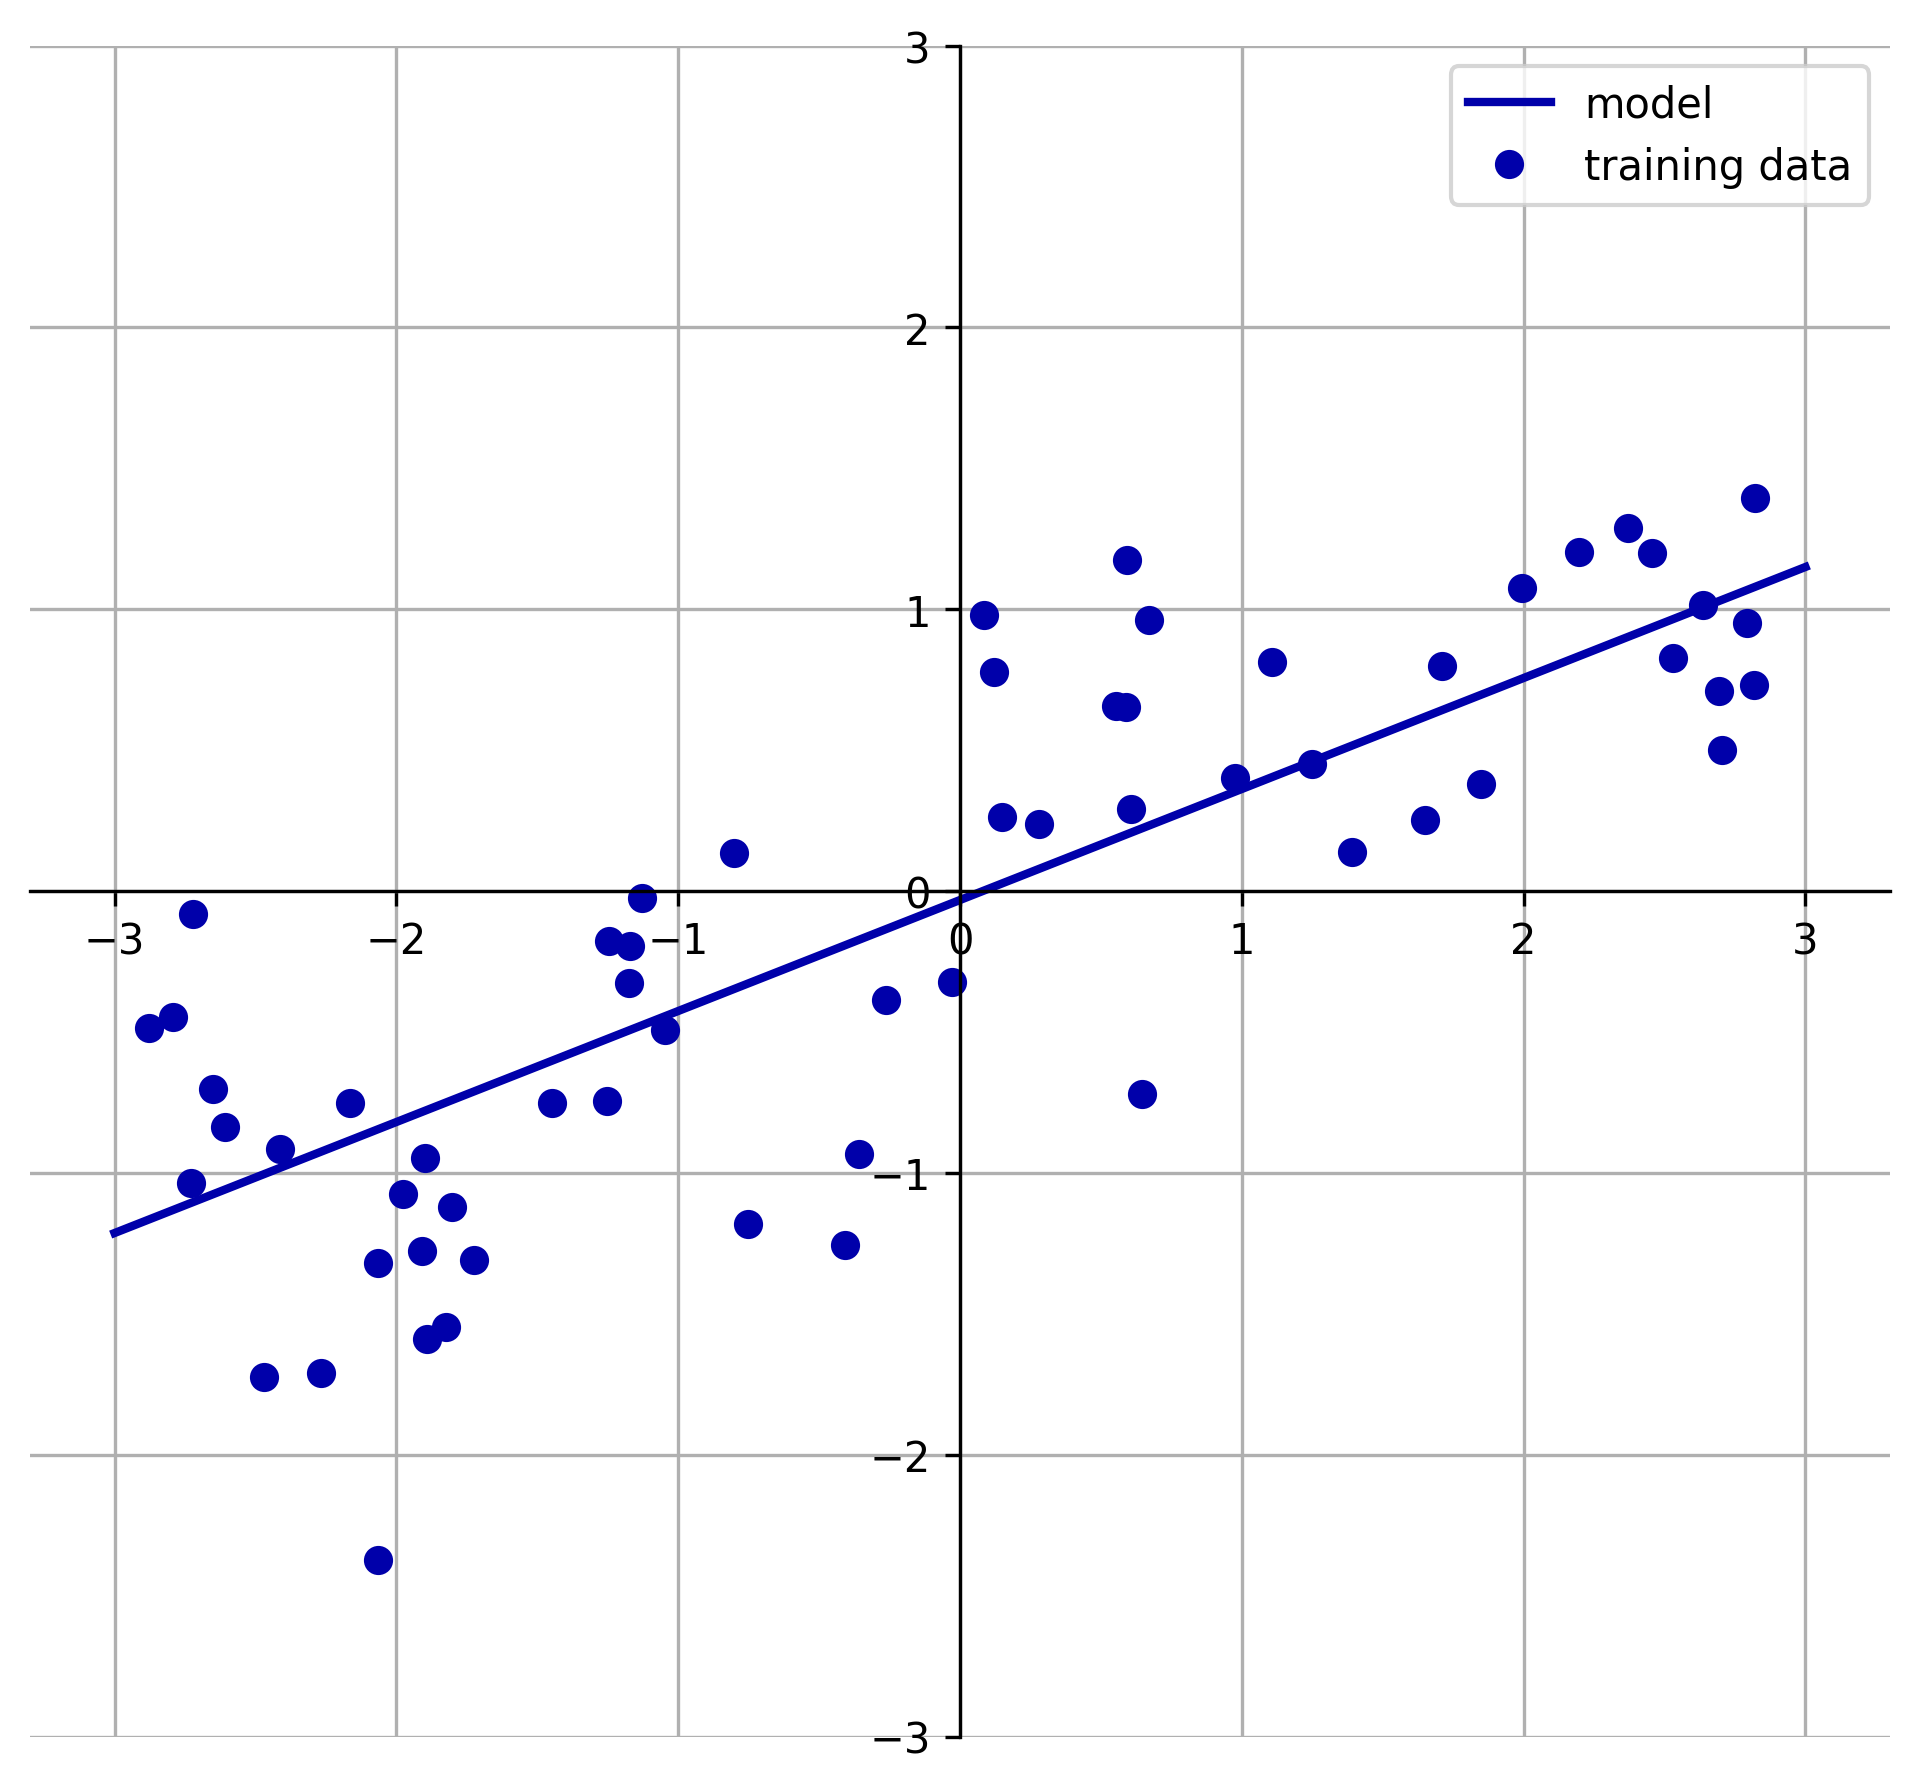

In [20]:
import inspect
mglearn.plots.plot_linear_regression_wave()
plt.show()

We added a coordinate cross into the plot to make it easier to understand the line. Looking at $ \hat{b}_1 $ we see that the slope should be around 0.4, which we can confirm visually in the plot. The intercept is where the prediction line should cross the y-axis: this is slightly below zero, which you can also confirm in the image.

Linear models for regression can be characterized as regression models for which the prediction is a line for a single feature, a plane when using two features, or a hyperplane in higher dimensions (that is, when using more features).

Using a straight line to make predictions seems very restrictive. It looks like all the fine details of the data are lost. In a sense, this is true. It is a strong (and somewhat unrealistic) assumption that our target y is a linear combination of the features. But looking at one-dimensional data gives a somewhat skewed perspective. For datasets with many features, linear models can be very powerful. In particular, if you have more features than training data points, any target y can be perfectly modeled (on the training set) as a linear function.

There are many different linear models for regression. The difference between these models lies in how the model parameters $\hat{b}_i$ are learned from the training data, and how model complexity can be controlled. We will now take a look at the most popular linear models for regression.

### Linear regression (aka ordinary least squares)

Linear regression, or *ordinary least squares (OLS)*, is the simplest and most classic linear method for regression. Linear regression finds the parameters $ \hat{b}_i $ that minimize the mean squared error between predictions and the true regression targets, y, on the training set. The mean squared error is the sum of the squared differences between the predictions and the true values, divided by the number of samples. Linear regression has no hyperparameters, which is a
benefit, but it also has no way to control model complexity.

Here is the code that produces the model you can see in the figure above:

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

The “slope” parameters $\hat{b}_1 \dots \hat{b}_p$, also called weights or coefficients, are stored in the ```coef_``` attribute, while the offset or intercept ($\hat{b}_0$) is stored in the ```intercept_``` attribute:

In [4]:
print("lr.coef_:", lr.coef_)
print("lr.intercept_:", lr.intercept_)

lr.coef_: [0.394]
lr.intercept_: -0.03180434302675976


__NOTE:__ You might notice the strange-looking trailing underscore at the end of ```coef_``` and ```intercept_```. scikit-learn always stores anything that is derived from the training data in attributes that end with a trailing underscore. That is to separate them from parameters that are set by the user.

The ```intercept_``` attribute is always a single float number, while the ```coef_``` attribute is a NumPy array with one entry per input feature. As we only have a single input feature in the wave dataset, ```lr.coef_``` only has a single entry.

Let’s look at the training set and test set performance:

### Explanation of `lr.score`

In scikit-learn, calling `lr.score(X, y)` on a linear regression model returns the **coefficient of determination**, commonly referred to as \(R^2\). Formally, for a set of true target values \(\{y_i\}\) and corresponding predictions \(\{\hat{y}_i\}\):

$$
R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2},
$$

where \(\bar{y}\) is the mean of the true target values.

- An \(R^2\) score of **1.0** indicates a perfect fit.
- An \(R^2\) score of **0.0** indicates the model does no better than predicting the mean of \(\{y_i\}\).
- Negative values can occur if the model performs worse than simply using the mean.

Hence, `lr.score(X, y)` represents the proportion of the variance in the target that is explained by the model.


In [21]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.64
Test set score: 0.77


A training $R^2$ of around 0.64 is not very good, but we can see that the scores on the training and test sets are very close together. This means we are likely underfitting, not overfitting. For this one-dimensional dataset, there is little danger of overfitting, as the model is very simple (or restricted). However, with higher-dimensional datasets (meaning datasets with a large number of features), linear models become more powerful, and there is a higher chance of overfitting. Let’s take a look at how ```LinearRegression``` performs on a more complex dataset, like the following synthetic dataset, with 200 features from just 100 samples. First, we make the dataset and split it into a training and a test set. Then we build the linear regression model as before:

In [22]:
from sklearn.datasets import make_regression
# Generate a regression dataset with 100 samples and 200 features
X, y = make_regression(
    n_samples=100,     # relatively small number of data points
    n_features=200,    # large number of features
    noise=10.0,        # added noise helps mimic real-world imperfection
    random_state=0
)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Fit a LinearRegression model
lr = LinearRegression().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 1.00
Test set score: 0.26


When comparing training set and test set scores, we find that we predict very accurately on the training set, but the $R^2$ on the test set is much worse:

This discrepancy between performance on the training set and the test set is a clear sign of overfitting, and therefore we should try to find a model that allows us to control complexity. One of the most commonly used alternatives to standard linear regression is *ridge regression*, which we will see in the future.

# k-neighbors regression

There is also a regression variant of the k-nearest neighbors algorithm. Again, let’s start by using the single nearest neighbor, using the wave dataset.

We’ve added three test data points as green stars on the x-axis. The prediction using a single neighbor is just the target value of the nearest neighbor. These are shown as blue stars in the Figure below:

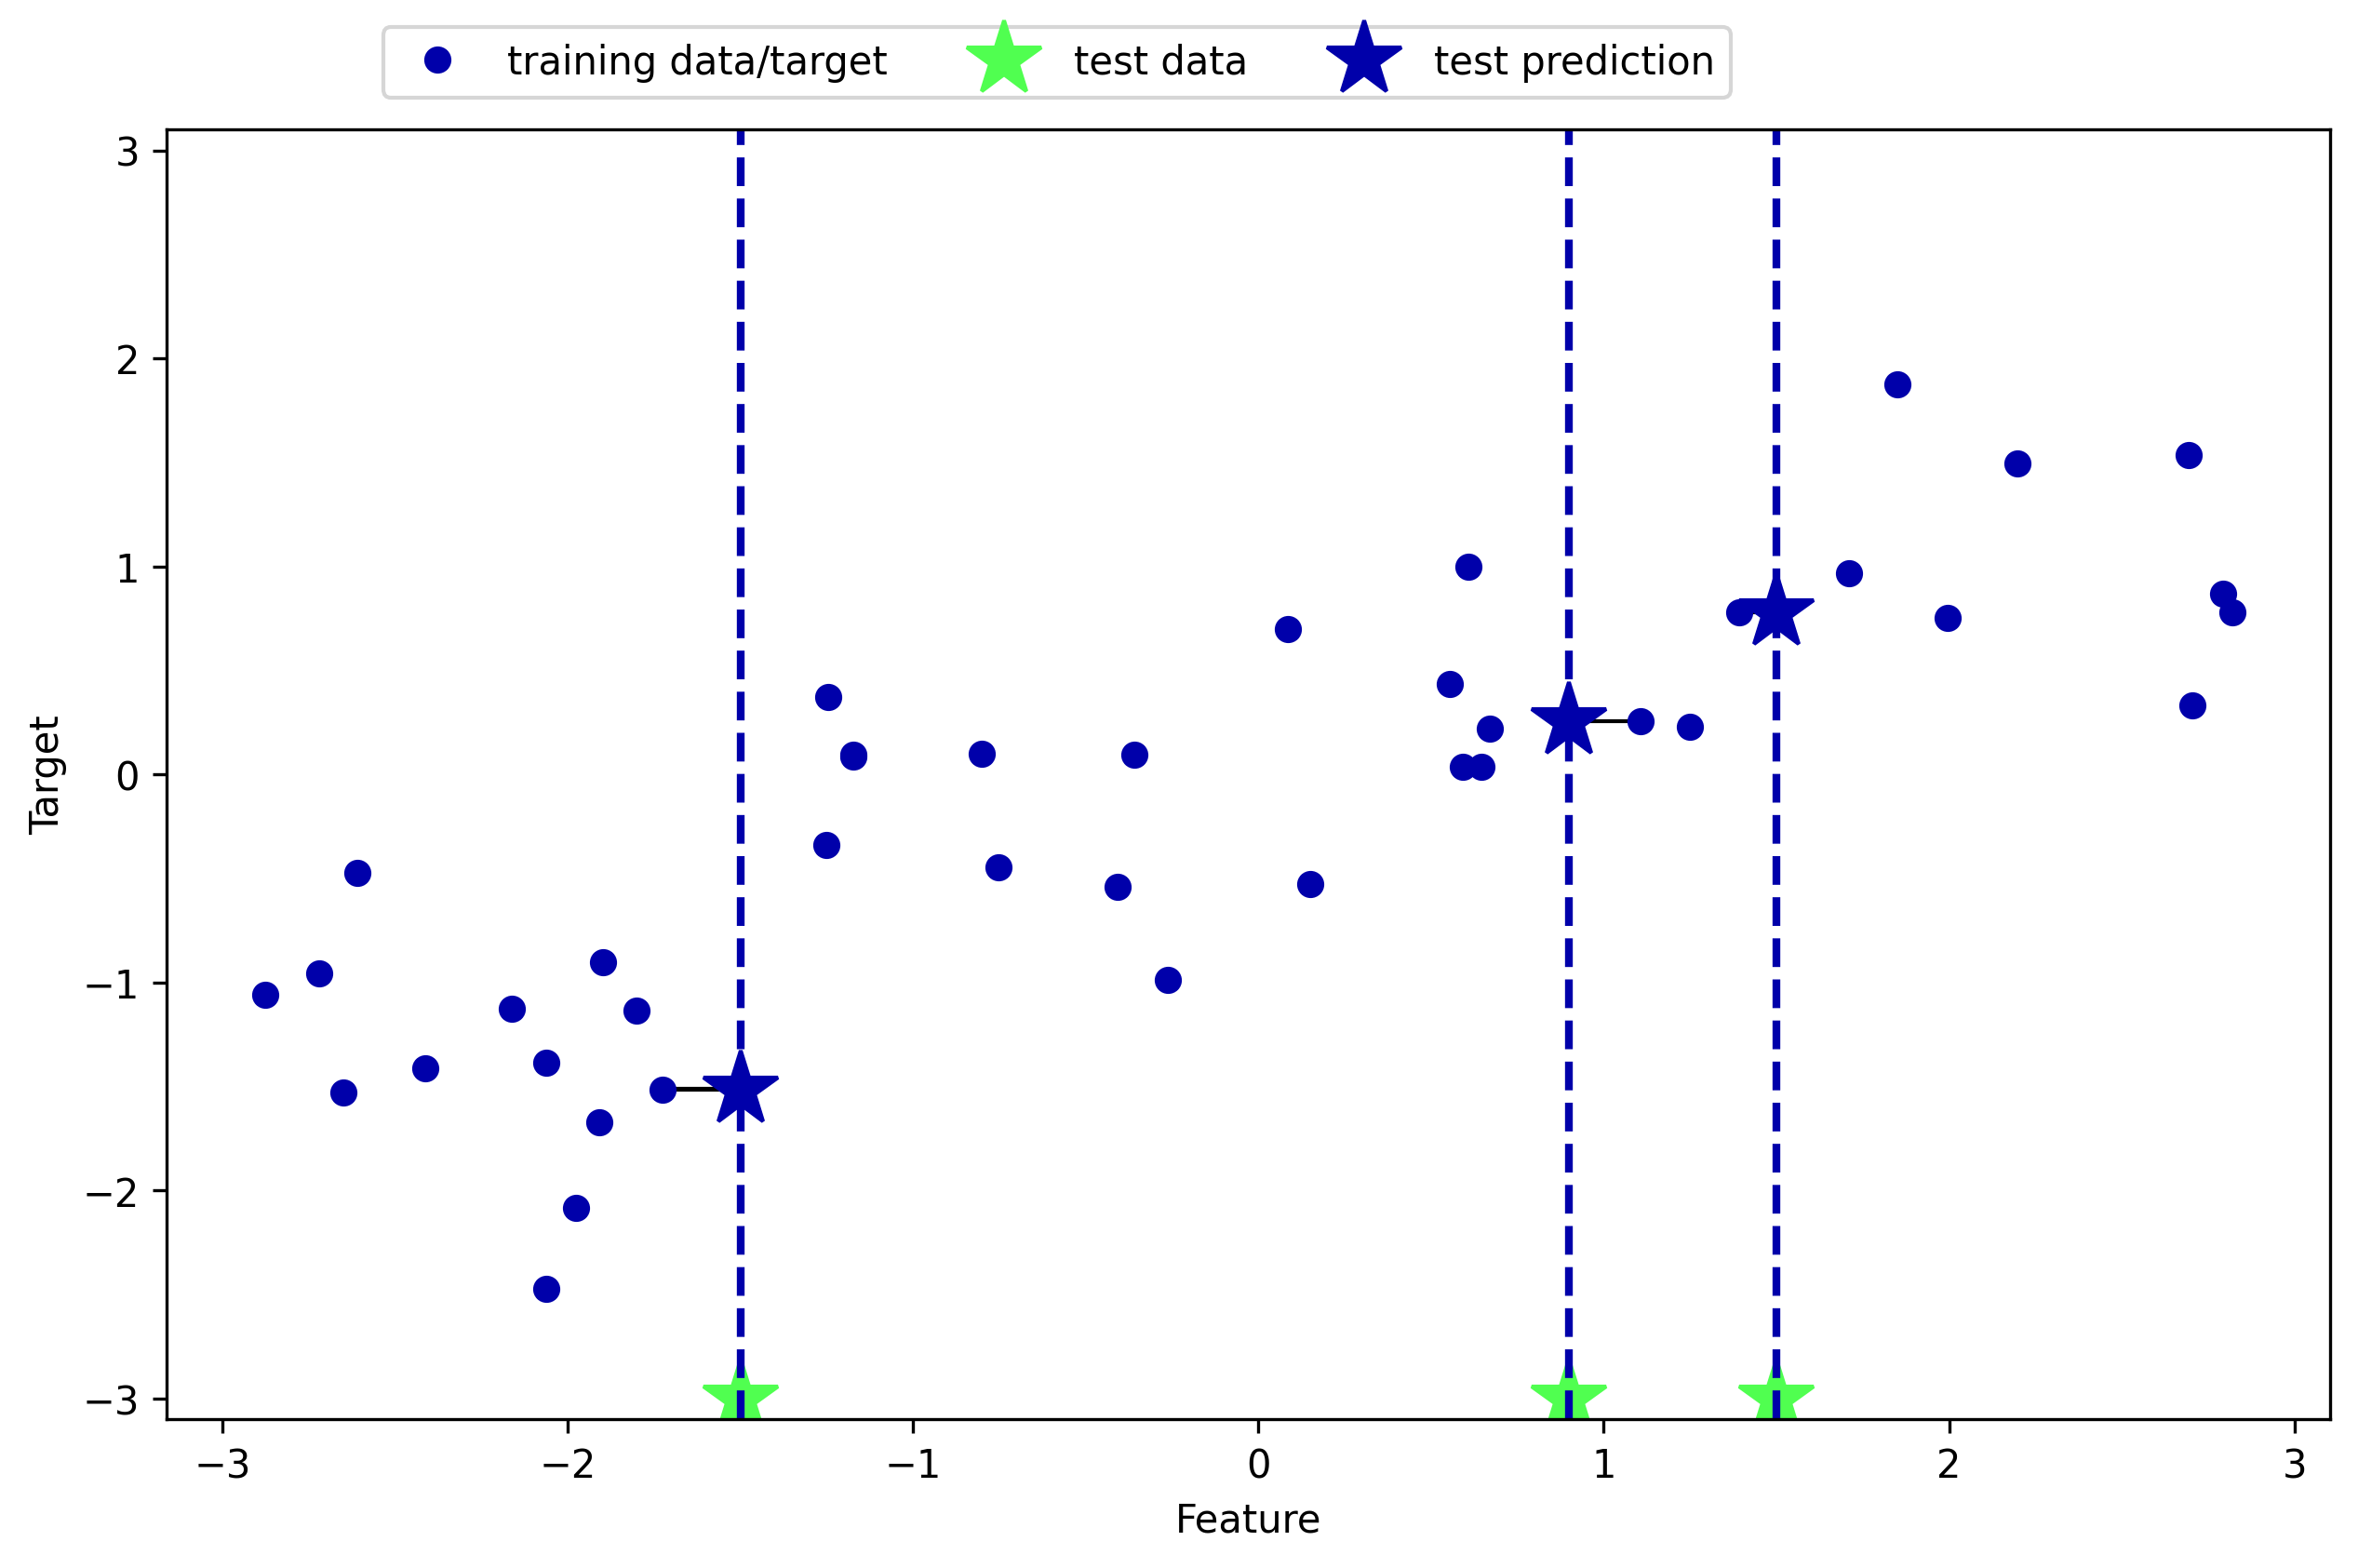

In [15]:
mglearn.plots.plot_knn_regression(n_neighbors=1)
plt.show()

Again, we can use more than the single closest neighbor for regression. When using multiple nearest neighbors, the prediction is the average, or mean, of the relevant neighbors.

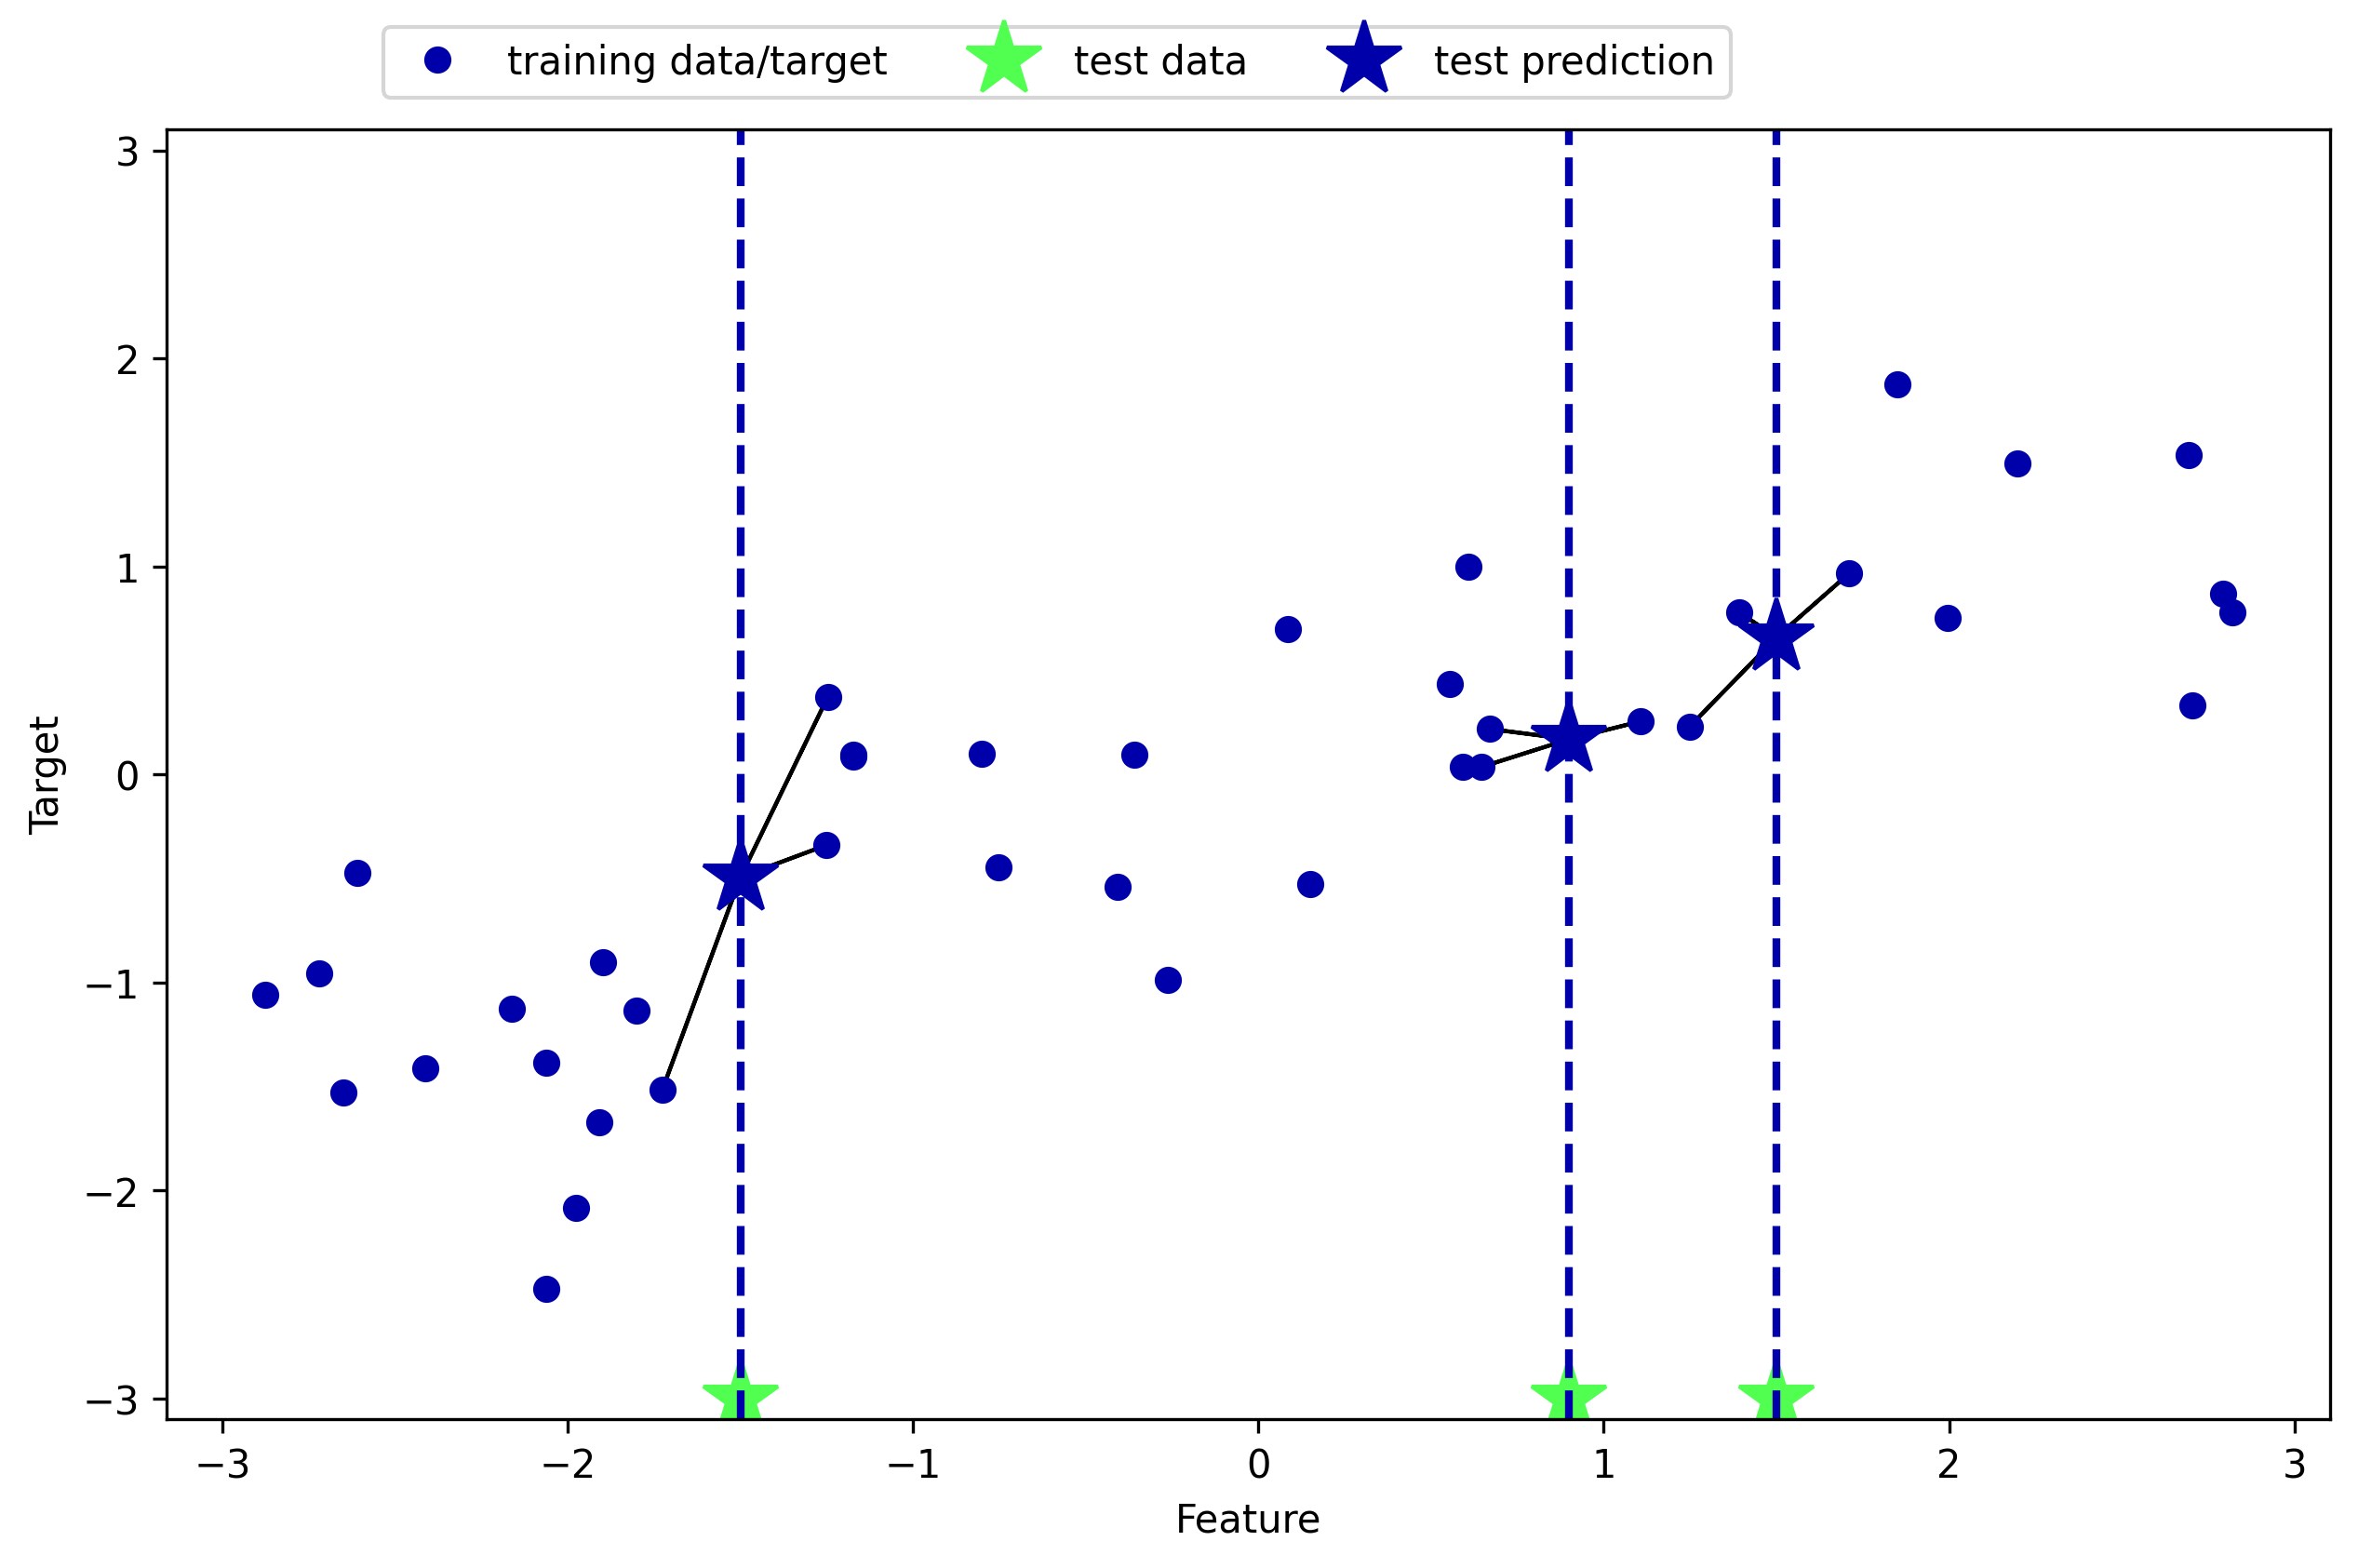

In [17]:
mglearn.plots.plot_knn_regression(n_neighbors=3)
plt.show()

The k-nearest neighbors algorithm for regression is implemented in the ```KNeighborsRegressor``` class in scikit-learn. It’s used similarly to KNeighborsClassifier:

In [18]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

# split the wave dataset into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# instantiate the model and set the number of neighbors to consider to 3
reg = KNeighborsRegressor(n_neighbors=3)
# fit the model using the training data and training targets
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

Now we can make predictions on the test set:

In [11]:
print("Test set predictions:\n", reg.predict(X_test))

Test set predictions:
 [-0.054  0.357  1.137 -1.894 -1.139 -1.631  0.357  0.912 -0.447 -1.139]


We can also evaluate the model using the score method, which for regressors returns the $R^2$ score. The $R^2$ score, also known as the coefficient of determination, is a measure of goodness of a prediction for a regression model, and yields a score that’s usually between 0 and 1. A value of 1 corresponds to a perfect prediction, and a value of 0 corresponds to a constant model that just predicts the mean of the training set responses, ```y_train```. The formulation of $R^2$ used here can even be negative, which can indicate anticorrelated predictions.

In [12]:
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Test set R^2: 0.83


Here, the score is 0.83, which indicates a relatively good model fit.

#### Analyzing KNeighborsRegressor

For our one-dimensional dataset, we can see what the predictions look like for all possible feature values. To do this, we create a test dataset consisting of many points on the x-axis, which corresponds to the single feature:

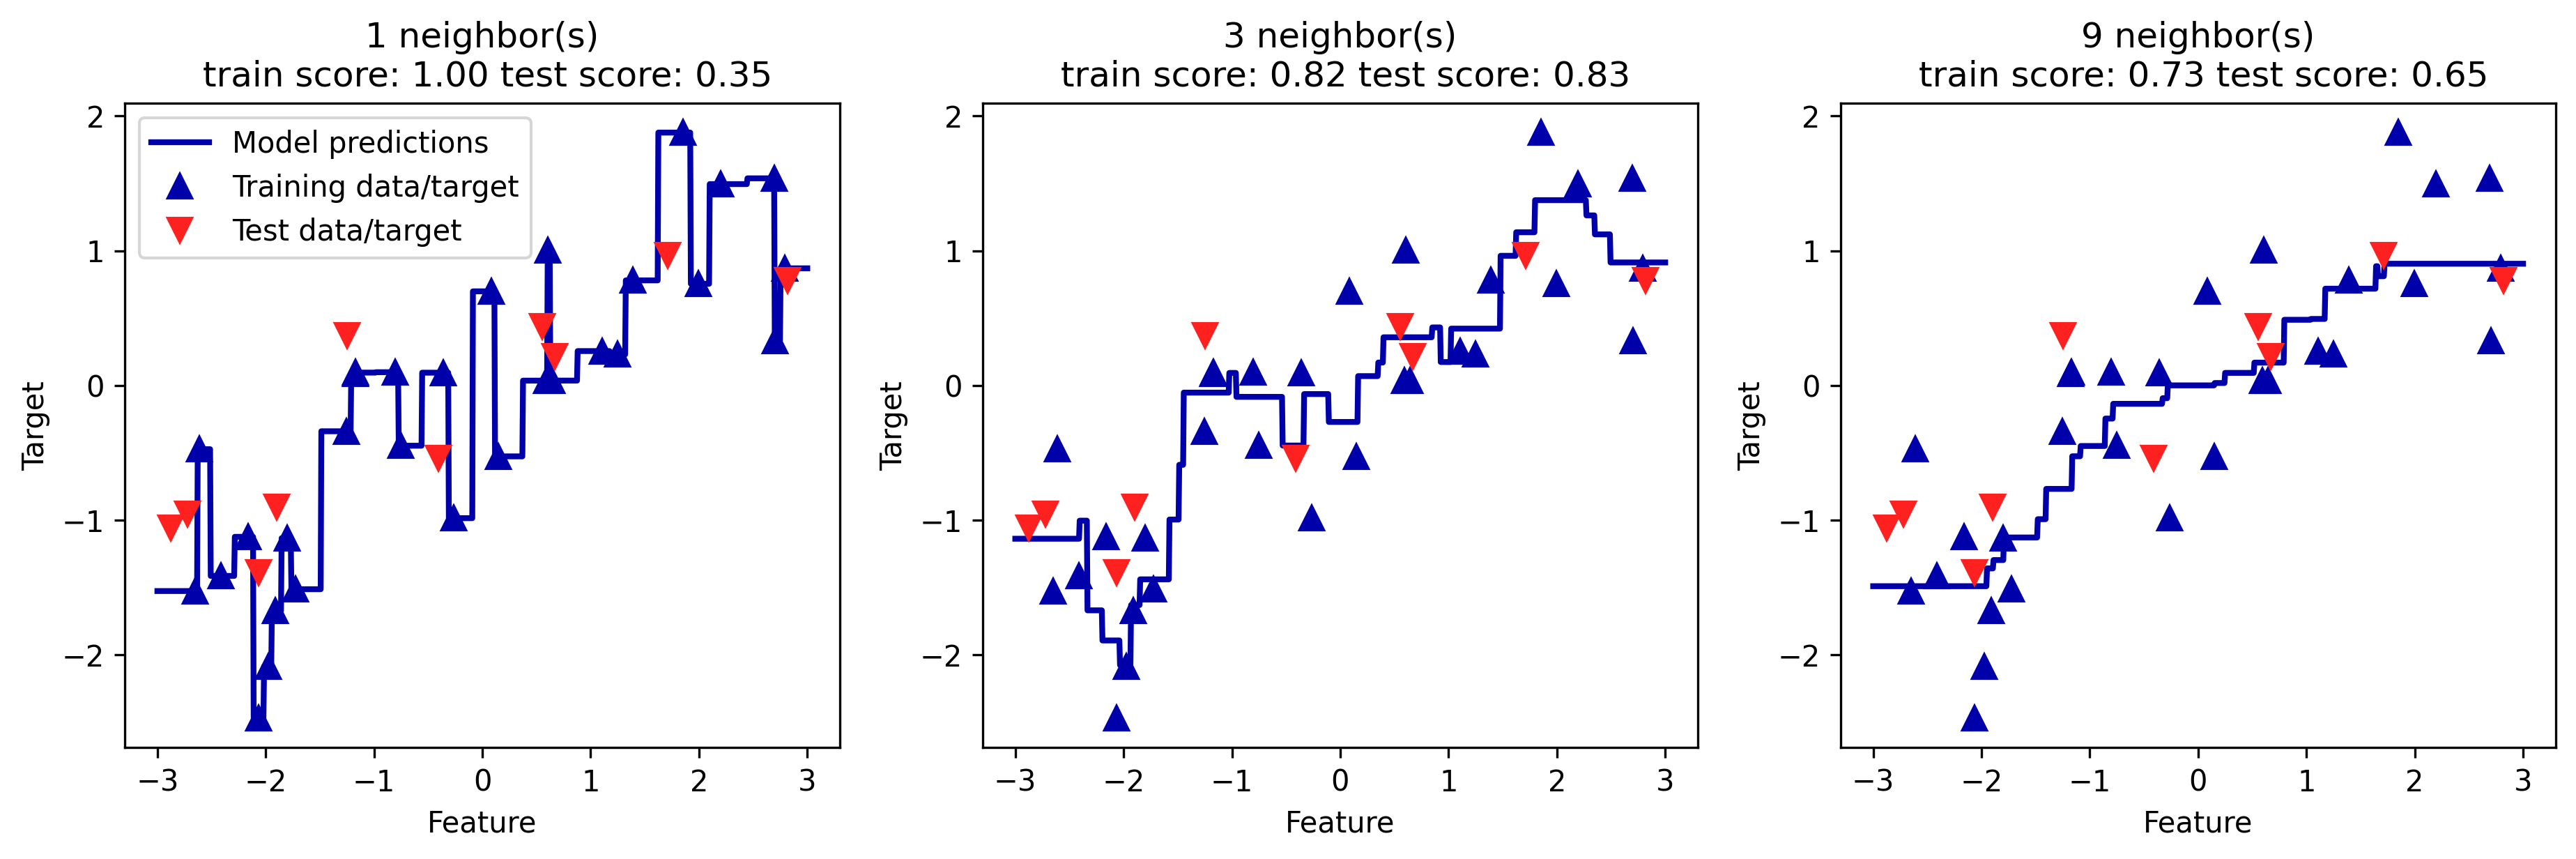

In [19]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# create 1,000 data points, evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # make predictions using 1, 3, or 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title(
        "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train),
            reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training data/target",
                "Test data/target"], loc="best")
plt.show()

As we can see from the plot, using only a single neighbor, each point in the training set has an obvious influence on the predictions, and the predicted values go through all of the data points. This leads to a very unsteady prediction. Considering more neighbors leads to smoother predictions, but these do not fit the training data as well.

#### Strengths, weaknesses, and parameters

In principle, there are two important parameters to the KNeighbors classifier: the number of neighbors and how you measure distance between data points. In practice, using a small number of neighbors like three or five often works well, but you should certainly adjust this parameter. Choosing the right distance measure is somewhat beyond the scope of this book. By default, Euclidean distance is used, which works well in many settings.

One of the strengths of k-NN is that the model is very easy to understand, and often gives reasonable performance without a lot of adjustments. Using this algorithm is a good baseline method to try before considering more advanced techniques. Building the nearest neighbors model is usually very fast, but when your training set is very large (either in number of features or in number of samples) prediction can be slow. When using the k-NN algorithm, it’s important to preprocess your data. This approach often does not perform well on datasets with many features (hundreds or more), and it does particularly badly with datasets where most features are 0 most of the time (so-called sparse datasets).

So, while the k-nearest neighbors algorithm is easy to understand, it is not often used in practice, due to prediction being slow and its inability to handle many features.